In [2]:
# Imports

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snsA
import plotly.express as px

# Reading/loading dataset
df = pd.read_csv('owid-covid-data.csv')
print(df)

       iso_code continent     location        date  total_cases  new_cases  \
0           AFG      Asia  Afghanistan  2020-01-03          NaN        0.0   
1           AFG      Asia  Afghanistan  2020-01-04          NaN        0.0   
2           AFG      Asia  Afghanistan  2020-01-05          NaN        0.0   
3           AFG      Asia  Afghanistan  2020-01-06          NaN        0.0   
4           AFG      Asia  Afghanistan  2020-01-07          NaN        0.0   
...         ...       ...          ...         ...          ...        ...   
302507      ZWE    Africa     Zimbabwe  2023-04-08     264578.0        2.0   
302508      ZWE    Africa     Zimbabwe  2023-04-09     264582.0        4.0   
302509      ZWE    Africa     Zimbabwe  2023-04-10     264584.0        2.0   
302510      ZWE    Africa     Zimbabwe  2023-04-11     264584.0        0.0   
302511      ZWE    Africa     Zimbabwe  2023-04-12     264584.0        0.0   

        new_cases_smoothed  total_deaths  new_deaths  new_death

In [3]:
# Exploring the dataset

print(df.columns)
print(df.head())
print(df.isnull().sum())

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [4]:
# Data Cleaning

countries = ['Kenya', 'United States', 'India']
df = df[df['location'].isin(countries)]
df = df.dropna(subset=['date', 'total_cases', 'total_deaths'])
df['date'] = pd.to_datetime(df['date'])
df = df.ffill()

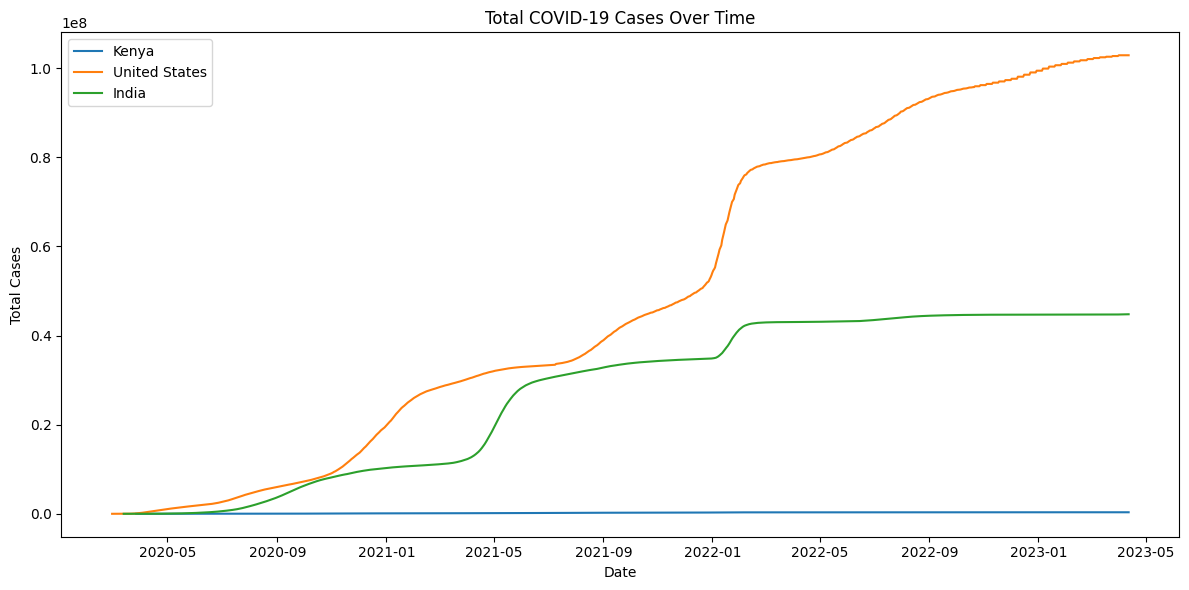

In [5]:
# Total cases over time

plt.figure(figsize=(12,6))
for country in countries:
    country_data = df[df['location'] == country]
    plt.plot(country_data['date'], country_data['total_cases'], label=country)
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.title('Total COVID-19 Cases Over Time')
plt.legend()
plt.tight_layout()
plt.show()

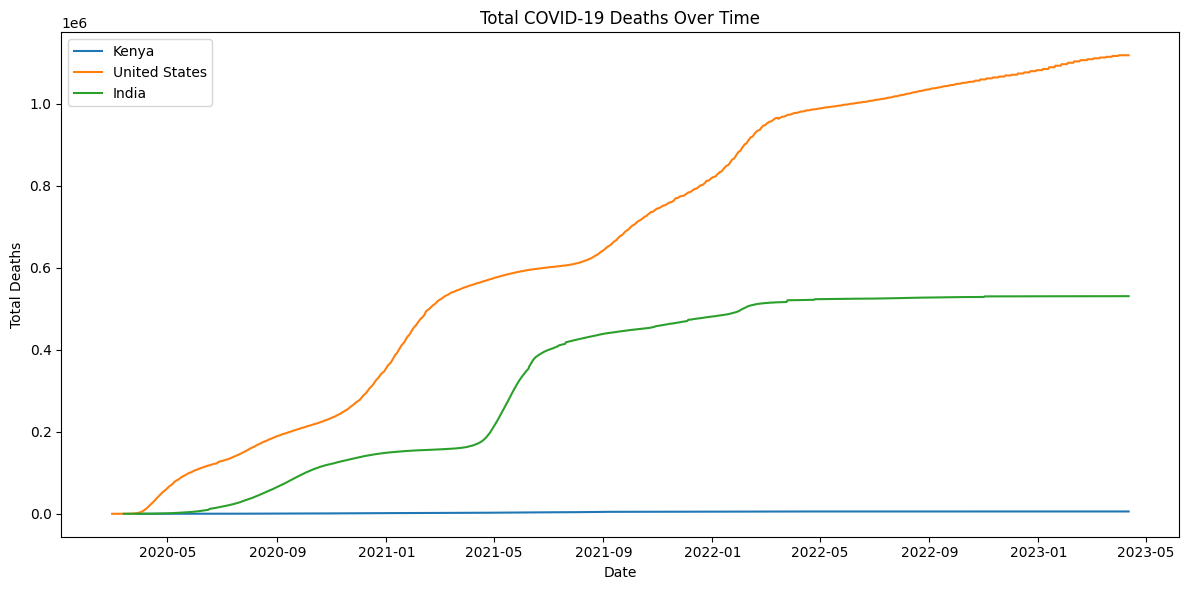

In [6]:
# Total deaths over time

plt.figure(figsize=(12,6))
for country in countries:
    country_data = df[df['location'] == country]
    plt.plot(country_data['date'], country_data['total_deaths'], label=country)
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.title('Total COVID-19 Deaths Over Time')
plt.legend()
plt.tight_layout()
plt.show()

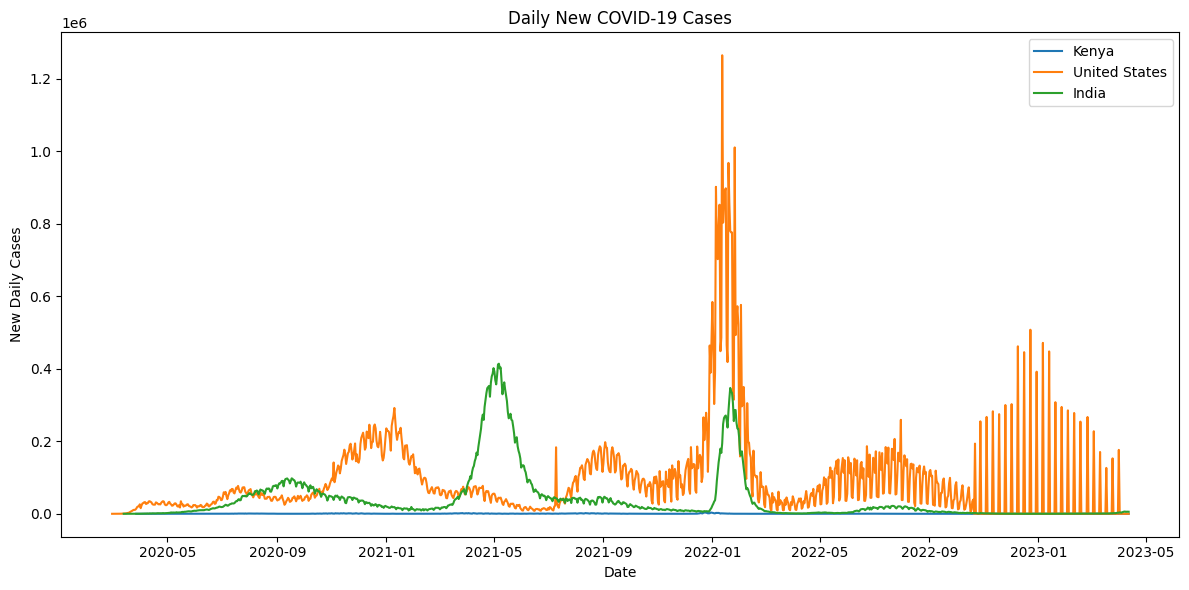

In [7]:
# New cases comparison

plt.figure(figsize=(12,6))
for country in countries:
    country_data = df[df['location'] == country]
    plt.plot(country_data['date'], country_data['new_cases'], label=country)
plt.xlabel('Date')
plt.ylabel('New Daily Cases')
plt.title('Daily New COVID-19 Cases')
plt.legend()
plt.tight_layout()
plt.show()

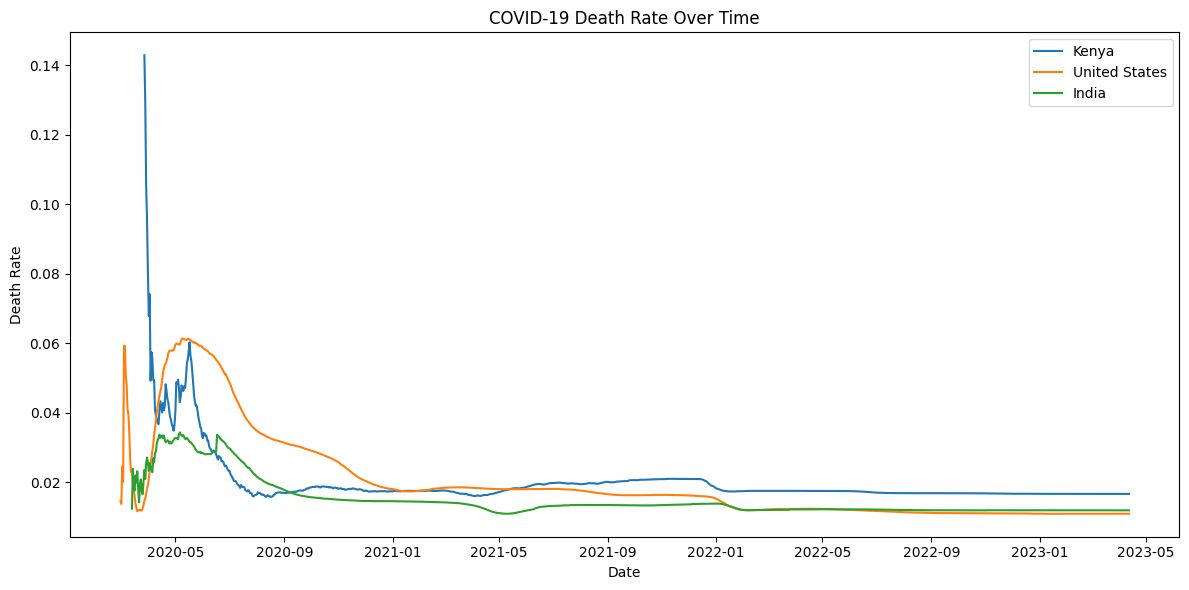

In [8]:
# Death rate over time

plt.figure(figsize=(12,6))
for country in countries:
    country_data = df[df['location'] == country].copy()
    country_data['death_rate'] = country_data['total_deaths'] / country_data['total_cases']
    plt.plot(country_data['date'], country_data['death_rate'], label=country)
plt.xlabel('Date')
plt.ylabel('Death Rate')
plt.title('COVID-19 Death Rate Over Time')
plt.legend()
plt.tight_layout()
plt.show()


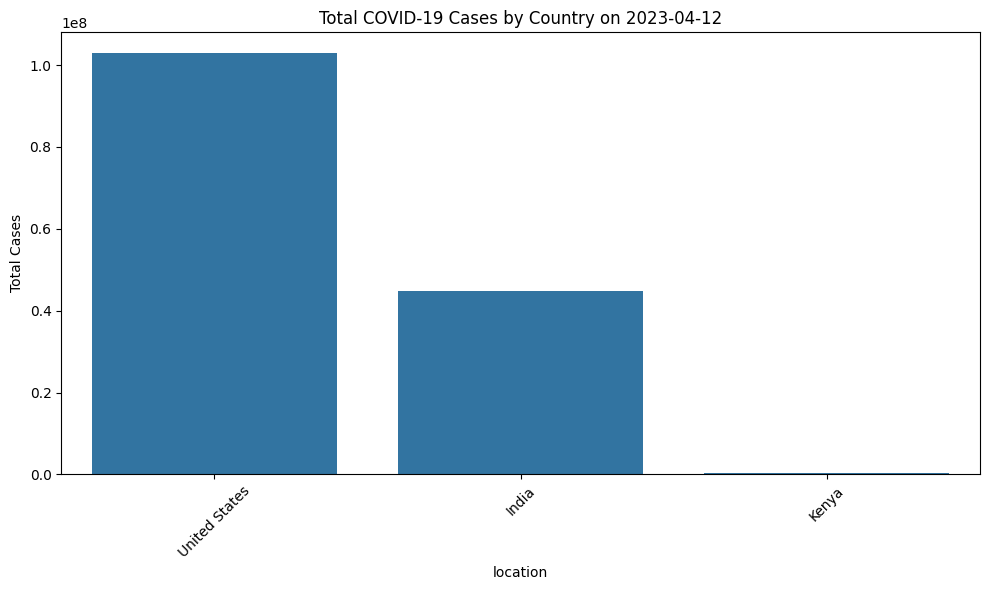

In [9]:
# Bar chart: Total cases by country (latest date)

latest_date = df['date'].max()
latest_data = df[df['date'] == latest_date]
total_cases_by_country = latest_data.groupby('location')['total_cases'].max().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=total_cases_by_country.index, y=total_cases_by_country.values)
plt.title(f'Total COVID-19 Cases by Country on {latest_date.date()}')
plt.xticks(rotation=45)
plt.ylabel('Total Cases')
plt.tight_layout()
plt.show()

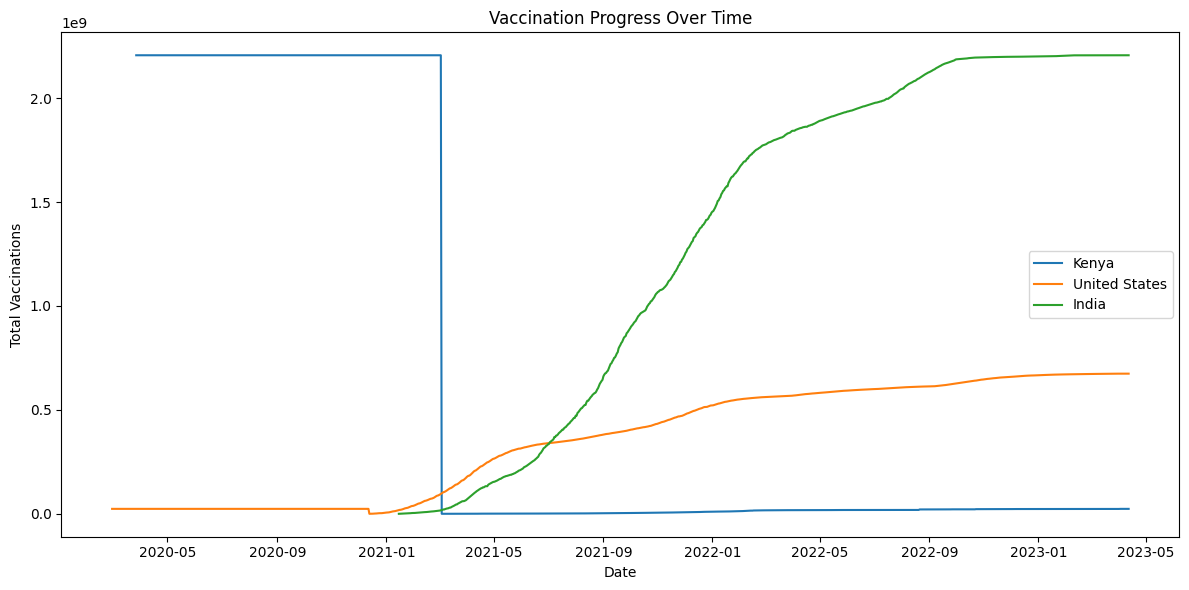

In [10]:
# Vaccination progress over time

plt.figure(figsize=(12,6))
for country in countries:
    country_data = df[df['location'] == country]
    plt.plot(country_data['date'], country_data['total_vaccinations'], label=country)
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.title('Vaccination Progress Over Time')
plt.legend()
plt.tight_layout()
plt.show()

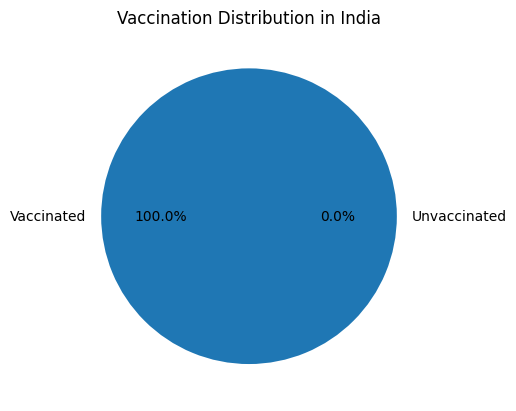

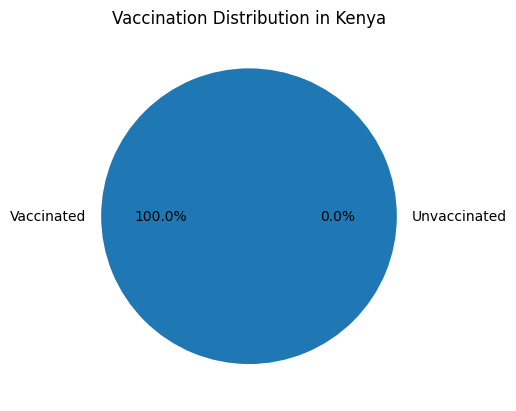

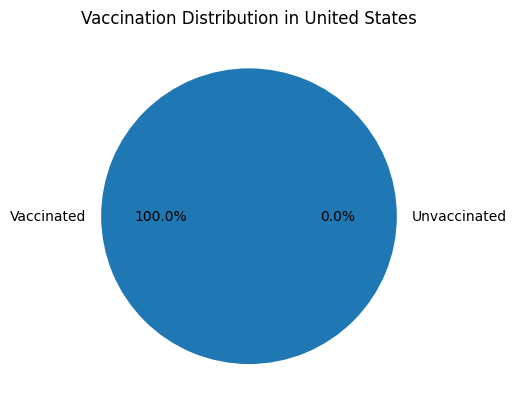

In [11]:
# Optional: Vaccinated vs unvaccinated pie chart (latest data)

vacc_data = latest_data[['location', 'total_vaccinations']]
vacc_data = vacc_data.dropna()
for index, row in vacc_data.iterrows():
    plt.figure()
    labels = ['Vaccinated', 'Unvaccinated']
    values = [row['total_vaccinations'], 1]  # Placeholder for unvaccinated if population data is missing
    plt.pie(values, labels=labels, autopct='%1.1f%%')
    plt.title(f'Vaccination Distribution in {row["location"]}')
    plt.show()

In [12]:
# Choropleth Map (Total Cases)

choropleth_data = df[df['date'] == latest_date][['iso_code', 'location', 'total_cases']]
choropleth_data = choropleth_data.dropna(subset=['iso_code', 'total_cases'])

fig = px.choropleth(
    choropleth_data,
    locations='iso_code',
    color='total_cases',
    hover_name='location',
    color_continuous_scale='Reds',
    title='Global COVID-19 Total Cases'
)
fig.show()

In [ ]:
# Alternative: Save the choropleth map to HTML
# This is useful for environments that do not support direct rendering of Plotly figures

# Choropleth Map (Total Cases) – Updated for environments without Jupyter rendering
# Only run this cell in environments that support Plotly rendering, like Jupyter Notebook

choropleth_data = df[df['date'] == latest_date][['iso_code', 'location', 'total_cases']]
choropleth_data = choropleth_data.dropna(subset=['iso_code', 'total_cases'])

fig = px.choropleth(
    choropleth_data,
    locations='iso_code',
    color='total_cases',
    hover_name='location',
    color_continuous_scale='Reds',
    title='Global COVID-19 Total Cases'
)

# Save to HTML instead of rendering directly
fig.write_html("covid_choropleth_map.html")
print("Choropleth map saved to covid_choropleth_map.html")

Choropleth map saved to covid_choropleth_map.html


In [ ]:
# Summary and Insights

"""
Summary of COVID-19 Global Data Analysis:

1. Data Overview:
   - Dataset includes daily records of COVID-19 cases, deaths, and vaccinations across multiple countries.
   - Key columns analyzed: total_cases, total_deaths, new_cases, total_vaccinations.

2. Time Trends:
   - All selected countries (Kenya, United States, India) show distinct waves of infections.
   - United States had the highest total cases and deaths among the three.

3. Death Rates:
   - Death rates generally declined over time, likely due to better treatments and increased vaccinations.

4. Vaccination Trends:
   - United States led early in vaccination rollout, followed by India.
   - Kenya showed slower vaccination uptake in comparison.

5. Visualization:
   - Line charts highlighted case and death trends.
   - Bar charts compared total cases by country.
   - Choropleth map revealed global distribution of total cases.

6. Limitations:
   - Missing or incomplete data for some countries/dates.
   - Unavailable population data limited accuracy of vaccination pie charts.

Conclusion:
This analysis provides a comprehensive view of COVID-19 trends using real-world data. It demonstrates how data visualization and statistical insights can be used to inform public health understanding and response.
"""